## I. Data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
sns.set_style("whitegrid")

In [2]:
#Two data sources are imported
filepath1 = 'data/Data1.csv'
data_orig1 = pd.read_csv(filepath1)
filepath2 = 'data/Data2.csv'
data_orig2 = pd.read_csv(filepath2)

In [114]:
#Function for extracting preffered data without low, middle and high income countries for last available year.
#Function arguments:
#    male, female - indicator names for both genders (input strings). 
# Function extracts data for preffered variable and total population size in countries. Then column 'Year' ir droped and DataFrame is reshaped for convenient analysis in the future.
# Last available datadata with total population in Poland is added in function,because it is not provided in data files.

def indicators_no_income(male, female, plot_title):
    new_table_orig = data[(data.Indicator.isin([male,female, 'Population, total (billions)']) & 
                           (data.Year=='Last available') & 
                           (data.Country != 'Low income') & 
                           (data.Country != 'Middle income') & 
                           (data.Country != 'High income'))]
    new_table_orig = new_table_orig.drop(['Year'],axis=1)
    new_table = new_table_orig.pivot(index='Country',columns='Indicator',values='Value')
    new_table[(new_table.index=='Poland') & (new_table['Population, total (billions)'].isna())] = new_table.replace(np.nan,38.3)
    
    xy_mines=new_table.loc[:,[male,female]].min()
    xy_min = xy_mines.min()
    xy_lim_min = (xy_min-xy_min/10)
    xy_maxes=new_table.loc[:,[male,female]].max()
    xy_max=xy_maxes.max()
    xy_lim_max = (xy_max+xy_max/10)    
        
    plt.figure(figsize=(8,8))
    new_plot=sns.scatterplot(x=male, 
                y=female,
                size = 'Population, total (billions)',sizes=(50,500),
                hue=new_table.index, data=new_table,alpha=0.8)
    plt.legend(loc='upper left',ncol=1,framealpha=0.5,borderpad=0.5,labelspacing=1.8,bbox_to_anchor=(1.05,0.9,0.1,0.1),borderaxespad=0.05)
    plt.title('\n'.join(wrap(plot_title,60)), fontsize=14)
    plt.xlabel('\n'.join(wrap(male,60)))
    plt.ylabel('\n'.join(wrap(female,60)))
    plt.xlim(left=xy_lim_min,right=xy_lim_max)
    plt.ylim(bottom=xy_lim_min,top=xy_lim_max)
    
    return new_table, new_plot

In [4]:
#Function for plotting general graphs. Function arguments:
#    indicator - select indicator name from data (string);
#    title - preffered title name (string);
#    y_bottom, y_top - limits for y axis.

def general_graph(indicator,title,y_bottom,y_top):
    graph_name = data[data.Indicator ==  indicator].sort_values(by = ['Country','Year']).reset_index(drop = True)
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(x='Year',y='Value',hue='Country',data=graph_name,ax=ax)
    plt.title(title,fontsize=14)
    plt.ylabel(indicator)
    plt.xticks(rotation=45)
    plt.ylim(bottom=y_bottom,top=y_top)
    plt.legend(loc=0,ncol=4,framealpha=0.5,borderpad=0.2)

## II. Data cleaning and preparing for vizualizations

In [5]:
#Drop columns 'Country Code', 'Series Code' and '2019[YR2019]'
data_orig1=data_orig1.drop(['Country Code','Series Code'],axis=1)
data_orig2=data_orig2.drop(['Country Code','Series Code','2019 [YR2019]'],axis=1)

In [6]:
data_orig1.columns

Index(['Country Name', 'Series Name', '1960 [YR1960]', '1965 [YR1965]',
       '1970 [YR1970]', '1975 [YR1975]', '1980 [YR1980]', '1985 [YR1985]',
       '1990 [YR1990]', '1995 [YR1995]', '2000 [YR2000]', '2005 [YR2005]',
       '2010 [YR2010]', '2015 [YR2015]', 'last_av'],
      dtype='object')

In [7]:
data_orig2.columns

Index(['Country Name', 'Series Name', '1960 [YR1960]', '1965 [YR1965]',
       '1970 [YR1970]', '1975 [YR1975]', '1980 [YR1980]', '1985 [YR1985]',
       '1990 [YR1990]', '1995 [YR1995]', '2000 [YR2000]', '2005 [YR2005]',
       '2010 [YR2010]', '2015 [YR2015]', 'last_av'],
      dtype='object')

In [8]:
#Merge two tables from different databases
data_orig=pd.concat([data_orig1,data_orig2],ignore_index=True)

In [9]:
#Convert missing values to NaN
data_orig=data_orig.replace('..',np.nan)
data_orig.head()

,Country Name,Series Name,1960 [YR1960],1965 [YR1965],1970 [YR1970],1975 [YR1975],1980 [YR1980],1985 [YR1985],1990 [YR1990],1995 [YR1995],2000 [YR2000],2005 [YR2005],2010 [YR2010],2015 [YR2015],last_av
0,Belarus,"Access to anti-retroviral drugs, female (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,21,37,65
1,Belarus,"Access to anti-retroviral drugs, male (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,20,31,62
2,Belarus,"Age at first marriage, female",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.7,NaN,NaN,22.5
3,Belarus,"Age at first marriage, male",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.8
4,Belarus,"Birth rate, crude (per 1,000 people)",23.455,19.09,15.976,15.642,16.177,16.5,14,9.9,9.4,9.3,11.4,12.5,9.9


In [10]:
#Rename columns
data_orig.rename(columns={'Country Name':'Country','Series Name':'Indicator','1960 [YR1960]':'1960', '1965 [YR1965]':'1965',
       '1970 [YR1970]':'1970', '1975 [YR1975]':'1975', '1980 [YR1980]':'1980', '1985 [YR1985]':'1985',
       '1990 [YR1990]':'1990', '1995 [YR1995]':'1995', '2000 [YR2000]':'2000', '2005 [YR2005]':'2005',
       '2010 [YR2010]':'2010', '2015 [YR2015]':'2015', 'last_av':'Last available'},inplace=True)

In [11]:
#Only rows with not-null values in column 'Indicator' are taken for future analysis (last 5 rows from each primary table should be removed, because contain some metadata)
data_orig = data_orig[data_orig['Indicator'].notna()]

In [12]:
#Reshape DataFrame
data=pd.melt(frame=data_orig,id_vars=['Country','Indicator'],var_name='Year', value_name='Value')
data.head(10)

,Country,Indicator,Year,Value
0,Belarus,"Access to anti-retroviral drugs, female (%)",1960,NaN
1,Belarus,"Access to anti-retroviral drugs, male (%)",1960,NaN
2,Belarus,"Age at first marriage, female",1960,NaN
3,Belarus,"Age at first marriage, male",1960,NaN
4,Belarus,"Birth rate, crude (per 1,000 people)",1960,23.455
5,Belarus,"Death rate, crude (per 1,000 people)",1960,9.918
6,Belarus,"Fertility rate, total (births per woman)",1960,2.67
7,Belarus,Length of paid parental leave for father (days),1960,NaN
8,Belarus,Length of paid parental leave for mother (days),1960,NaN
9,Belarus,Length of paid paternity leave (days),1960,NaN


In [13]:
#Convert column 'Value' type from string to float
data['Value'] = data['Value'].astype(float)

In [14]:
#Converting total population values to millions
data.loc[data.Indicator == 'Population, total', 'Value'] = data.Value/1000000

In [15]:
#Rounding values to 1 decimal
data['Value'] = np.round(data['Value'],decimals=1)

In [16]:
#Rename indicator 
data= data.replace('Population, total','Population, total (billions)')

In [17]:
#Extract data with birth rate and death rate for calculation of natural population change
birth_rate = data[data.Indicator=='Birth rate, crude (per 1,000 people)'].sort_values(by=['Country','Year']).reset_index(drop=True)
death_rate = data[data.Indicator=='Death rate, crude (per 1,000 people)'].sort_values(by=['Country','Year']).reset_index(drop=True)

In [18]:
#Create table for calculation of Natural population change
nat_ch = data[data.Indicator=='Death rate, crude (per 1,000 people)'].sort_values(by=['Country','Year']).reset_index(drop=True)
nat_ch.rename(columns={'Death rate, crude (per 1,000 people)':'Natural population change, crude (per 1,000 people)'},inplace=True)

In [19]:
#Calculate new value 'Natural population change' in the table nat_ch (based on birth and death rates)
nat_ch['Value'] = np.where(birth_rate['Value'] == death_rate['Value'], 0, birth_rate['Value'] - death_rate['Value']) 
nat_ch = nat_ch.drop(['Indicator'],axis=1)

### Now as all the tables are prepared, we can plot the data and make some insights and conclusions. The list of available indicators is below:

In [111]:
data.Indicator.unique()

array(['Access to anti-retroviral drugs, female (%)',
       'Access to anti-retroviral drugs, male (%)',
       'Age at first marriage, female', 'Age at first marriage, male',
       'Birth rate, crude (per 1,000 people)',
       'Death rate, crude (per 1,000 people)',
       'Fertility rate, total (births per woman)',
       'Length of paid parental leave for father (days)',
       'Length of paid parental leave for mother (days)',
       'Length of paid paternity leave (days)',
       'Length of paid maternity leave (days)',
       'Rural population, female (% of total)',
       'Rural population, male (% of total)',
       'Urban population, male (% of total)',
       'Urban population, female (% of total)',
       'Saved any money in the past year, female  (% age 15+)',
       'Saved any money in the past year, male  (% age 15+)',
       'Smoking prevalence, males (% of adults)',
       'Smoking prevalence, females (% of adults)',
       'Total alcohol consumption per capita, male

## III. How do Lithuania look among other countries by general indicators?

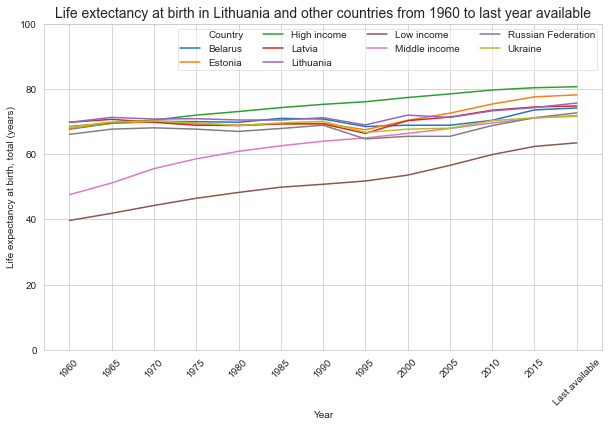

In [20]:
#Life expectancy
general_graph('Life expectancy at birth, total (years)','Life extectancy at birth in Lithuania and other countries from 1960 to last year available',0,100)

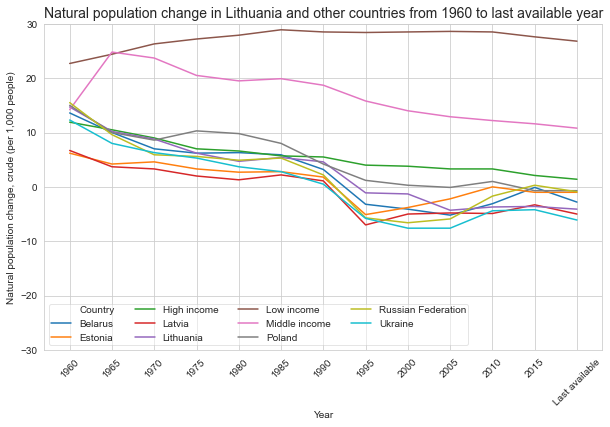

In [21]:
#Natural population change
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Year',y='Value',hue='Country',data=nat_ch,ax=ax)
plt.title("Natural population change in Lithuania and other countries from 1960 to last available year",fontsize=14)
plt.ylabel('Natural population change, crude (per 1,000 people)')
plt.xticks(rotation=45)
plt.ylim(bottom=-30,top=30)
plt.legend(loc=0,ncol=4,framealpha=0.5,borderpad=0.2)

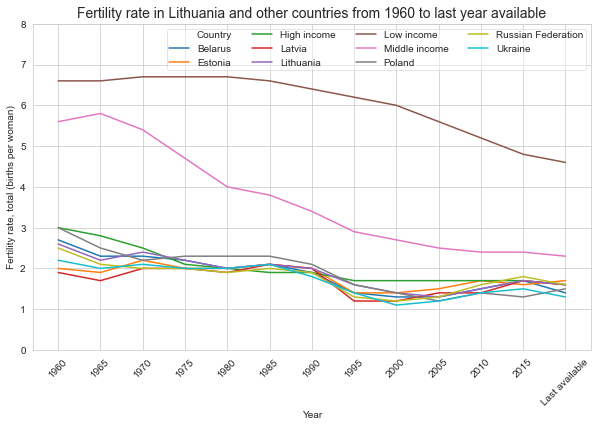

In [22]:
#Fertility
general_graph('Fertility rate, total (births per woman)','Fertility rate in Lithuania and other countries from 1960 to last year available',0,8)

4.0

36.3

Indicator,"Population, total (billions)","Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)","Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)"
Country,,,
Belarus,9.5,5.5,18.0
Estonia,1.3,4.9,19.4
Latvia,1.9,5.7,21.7
Lithuania,2.8,6.9,24.9
Poland,38.3,4.7,19.2
Russian Federation,144.4,5.8,18.7
Ukraine,44.4,4.0,14.1


36.3

## IV. What are the differences between men and woman in various countries?

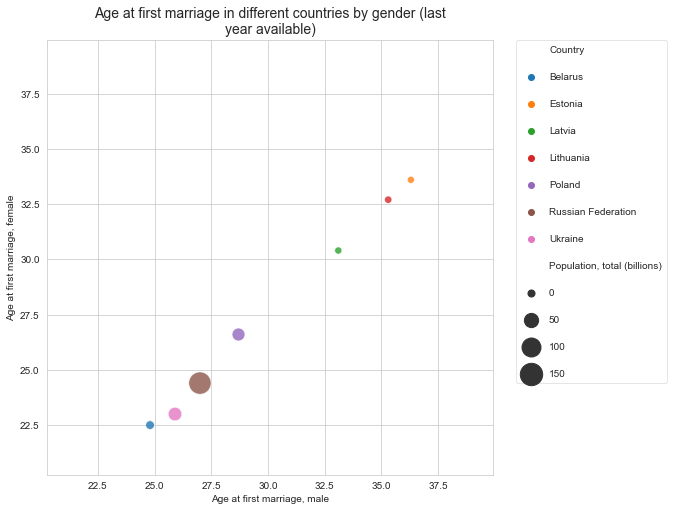

In [115]:
age_at_mar,age_at_mar_plot = indicators_no_income('Age at first marriage, male', 'Age at first marriage, female','Age at first marriage in different countries by gender (last year available)')

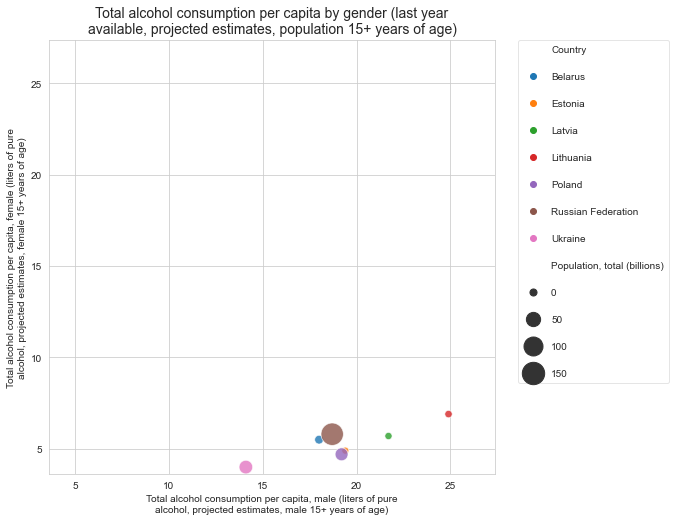

In [116]:
alcohol,alcohol_plot = indicators_no_income('Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)','Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)','Total alcohol consumption per capita by gender (last year available, projected estimates, population 15+ years of age)')

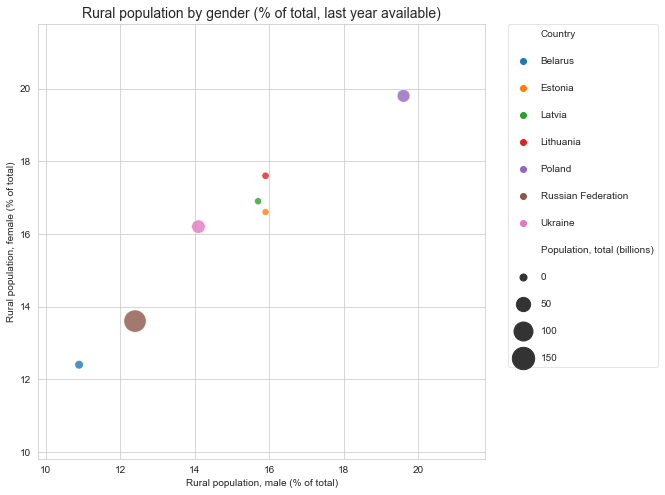

In [117]:
rural_pop,rural_pop_plot = indicators_no_income('Rural population, male (% of total)','Rural population, female (% of total)','Rural population by gender (% of total, last year available)')

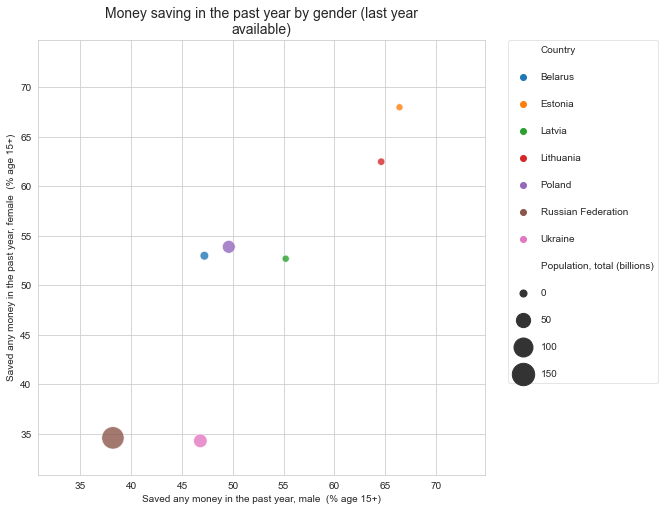

In [118]:
saved_money,saved_money_plot = indicators_no_income('Saved any money in the past year, male  (% age 15+)','Saved any money in the past year, female  (% age 15+)','Money saving in the past year by gender (last year available)')

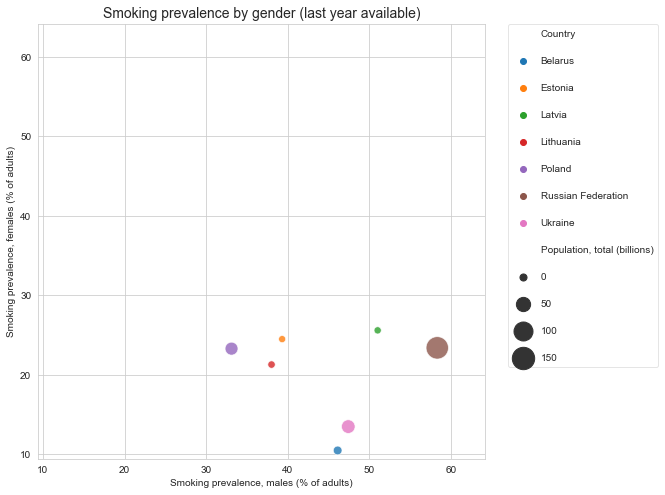

In [119]:
smoking,smoking_plot = indicators_no_income('Smoking prevalence, males (% of adults)','Smoking prevalence, females (% of adults)','Smoking prevalence by gender (last year available)')

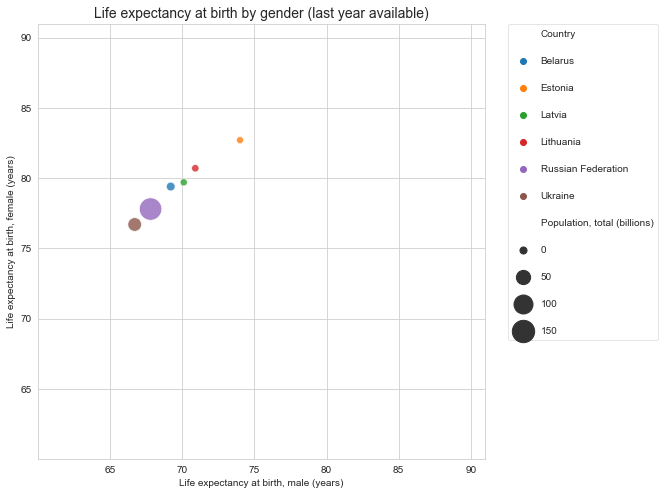

In [120]:
LE_bg,LE_bg_plot = indicators_no_income('Life expectancy at birth, male (years)','Life expectancy at birth, female (years)','Life expectancy at birth by gender (last year available)')

array(['Access to anti-retroviral drugs, female (%)',
       'Access to anti-retroviral drugs, male (%)',
       'Age at first marriage, female', 'Age at first marriage, male',
       'Birth rate, crude (per 1,000 people)',
       'Death rate, crude (per 1,000 people)',
       'Fertility rate, total (births per woman)',
       'Length of paid parental leave for father (days)',
       'Length of paid parental leave for mother (days)',
       'Length of paid paternity leave (days)',
       'Length of paid maternity leave (days)',
       'Rural population, female (% of total)',
       'Rural population, male (% of total)',
       'Urban population, male (% of total)',
       'Urban population, female (% of total)',
       'Saved any money in the past year, female  (% age 15+)',
       'Saved any money in the past year, male  (% age 15+)',
       'Smoking prevalence, males (% of adults)',
       'Smoking prevalence, females (% of adults)',
       'Total alcohol consumption per capita, male

## V. How did differences between men and woman in Lithuania changed through years?

In [29]:
data.Indicator.unique()

array(['Access to anti-retroviral drugs, female (%)',
       'Access to anti-retroviral drugs, male (%)',
       'Age at first marriage, female', 'Age at first marriage, male',
       'Birth rate, crude (per 1,000 people)',
       'Death rate, crude (per 1,000 people)',
       'Fertility rate, total (births per woman)',
       'Length of paid parental leave for father (days)',
       'Length of paid parental leave for mother (days)',
       'Length of paid paternity leave (days)',
       'Length of paid maternity leave (days)',
       'Rural population, female (% of total)',
       'Rural population, male (% of total)',
       'Urban population, male (% of total)',
       'Urban population, female (% of total)',
       'Saved any money in the past year, female  (% age 15+)',
       'Saved any money in the past year, male  (% age 15+)',
       'Smoking prevalence, males (% of adults)',
       'Smoking prevalence, females (% of adults)',
       'Total alcohol consumption per capita, male